<a href="https://colab.research.google.com/github/ujjwalaggarwal25/fraud_detection/blob/main/Fraud_Transaction_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Internship - TechnoHacks EduTech

### TASK 3 : FRAUD TRANSACTION DETECTION

### BY UJJWAL AGGARWAL

IMPORTING LIBRARIES

In [10]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


LOADING THE DATASET

In [45]:
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

DISPLAYING THE FIRST 5 ROWS

In [43]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


DISPLAYING THE LAST 5 ROWS

In [14]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
7968,10980,1.284388,-0.013181,0.646174,0.198985,-0.568675,-0.526121,-0.448235,-0.167709,1.773223,...,-0.101868,-0.030298,-0.081412,-0.123281,0.278808,1.064001,-0.090181,0.000481,15.95,0.0
7969,10981,1.190428,-0.122329,0.954945,0.267101,-0.971026,-0.652279,-0.612992,-0.003909,1.633117,...,-0.015001,0.127027,0.012079,0.534409,0.112179,1.004483,-0.100188,-0.004774,14.95,0.0
7970,10981,-0.725175,0.298202,1.824761,-2.587170,0.283605,-0.016617,0.153659,0.045084,-0.197611,...,-0.017097,-0.070535,-0.442861,-0.895837,0.624743,-0.510601,-0.031142,0.025564,12.95,0.0
7971,10981,1.226153,-0.129645,0.735197,0.142752,-0.703245,-0.349641,-0.612641,0.020507,1.648986,...,-0.047936,0.040196,-0.057391,-0.012386,0.187685,1.037786,-0.100081,-0.009869,15.95,0.0
7972,10981,1.145381,-0.059349,0.968088,0.267891,-0.822582,-0.597727,-0.450197,-0.119747,1.338188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


INFORMATION ABOUT DATASET

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    7973 non-null   int64  
 1   V1      7973 non-null   float64
 2   V2      7973 non-null   float64
 3   V3      7973 non-null   float64
 4   V4      7973 non-null   float64
 5   V5      7973 non-null   float64
 6   V6      7973 non-null   float64
 7   V7      7973 non-null   float64
 8   V8      7973 non-null   float64
 9   V9      7973 non-null   float64
 10  V10     7973 non-null   float64
 11  V11     7973 non-null   float64
 12  V12     7973 non-null   float64
 13  V13     7973 non-null   float64
 14  V14     7973 non-null   float64
 15  V15     7972 non-null   float64
 16  V16     7972 non-null   float64
 17  V17     7972 non-null   float64
 18  V18     7972 non-null   float64
 19  V19     7972 non-null   float64
 20  V20     7972 non-null   float64
 21  V21     7972 non-null   float64
 22  

HANDLING MISSING VALUES

In [16]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [17]:
data["Class"].value_counts()

0.0    7947
1.0      25
Name: Class, dtype: int64

In [18]:
legit = data[data.Class==0]
fraud = data[data.Class==1]

In [19]:
print(legit.shape)
print(fraud.shape)

(7947, 31)
(25, 31)


In [20]:
legit.Amount.describe()

count    7947.000000
mean       65.284891
std       194.126547
min         0.000000
25%         4.795000
50%        15.950000
75%        54.990000
max      7712.430000
Name: Amount, dtype: float64

In [21]:
fraud.Amount.describe()

count      25.000000
mean      106.308400
std       372.676883
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1809.680000
Name: Amount, dtype: float64

In [22]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,4246.546496,-0.297235,0.286979,0.917142,0.201968,-0.023263,0.164019,-0.019547,-0.072779,0.662196,...,0.042418,-0.055123,-0.165485,-0.034918,0.026636,0.088960,0.019511,0.014875,0.000417,65.284891
1.0,7359.240000,-1.154048,2.930880,-4.757618,4.590240,-0.636103,-1.952536,-2.202403,0.647916,-1.581984,...,0.263011,0.393614,-0.265715,-0.116502,-0.183413,0.067479,0.256994,0.421586,0.237600,106.308400


In [23]:
legit_sample = legit.sample(n=492)

In [24]:
new_dataset = pd.concat([legit_sample, fraud],axis=0)

In [25]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
5873,6417,1.282408,0.702030,0.052703,1.297862,0.219690,-1.116206,0.539052,-0.503245,0.826751,...,-0.134583,-0.022951,-0.147833,0.372419,0.870612,-0.338633,-0.026793,0.006941,1.00,0.0
2594,2123,1.283067,0.355695,0.073521,0.991784,-0.004908,-0.659602,0.209095,-0.201116,0.013377,...,-0.007630,0.031368,-0.165418,-0.139421,0.760822,-0.295187,0.013388,0.014925,3.90,0.0
6293,7433,0.522485,-1.131764,-1.452175,0.781320,1.881187,3.792453,-0.020899,0.668669,1.412062,...,-0.100615,-0.870283,-0.454227,0.968609,0.728700,-0.406295,-0.074149,0.073090,393.46,0.0
2712,2252,-1.583550,0.545735,0.869472,1.305566,1.877753,-0.721648,0.955917,-0.193203,-1.269137,...,-0.032614,-0.178639,-0.361446,-0.584223,0.584488,-0.043587,-0.230447,0.219105,31.05,0.0
7416,10018,-0.308614,0.321557,1.666761,0.516714,-0.332586,-0.351705,0.170000,-0.306486,1.350446,...,-0.305837,-0.344844,0.042935,0.572986,-0.756634,1.351620,-0.441933,-0.157956,29.63,0.0


In [26]:
new_dataset['Class'].value_counts()

0.0    492
1.0     25
Name: Class, dtype: int64

In [27]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,4374.018293,-0.452689,0.27517,0.989938,0.28855,0.051966,0.175998,-0.033298,-0.079940,0.713219,...,0.029065,-0.017005,-0.139383,-0.013347,0.047883,0.079222,0.051939,0.017497,-0.007841,63.32372
1.0,7359.240000,-1.154048,2.93088,-4.757618,4.59024,-0.636103,-1.952536,-2.202403,0.647916,-1.581984,...,0.263011,0.393614,-0.265715,-0.116502,-0.183413,0.067479,0.256994,0.421586,0.237600,106.30840


VISUALIZATION OF OUR DATASET

Text(0, 0.5, 'Frequency')

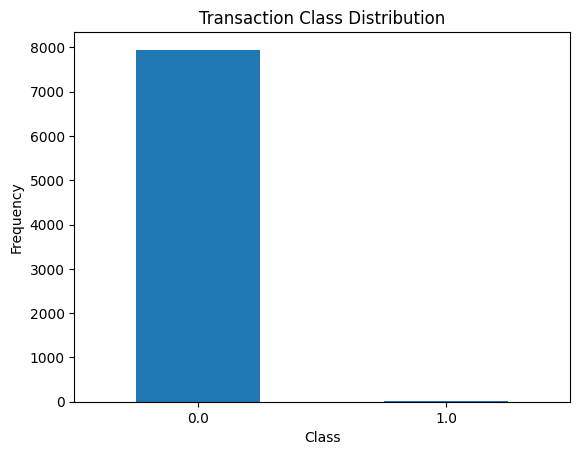

In [28]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

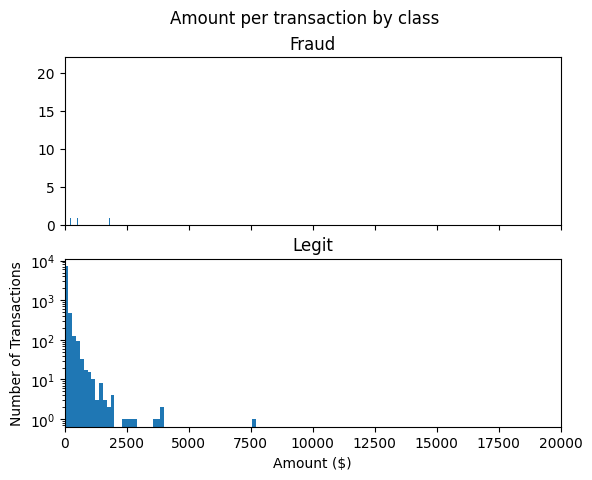

In [29]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(legit.Amount, bins = bins)
ax2.set_title('Legit')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

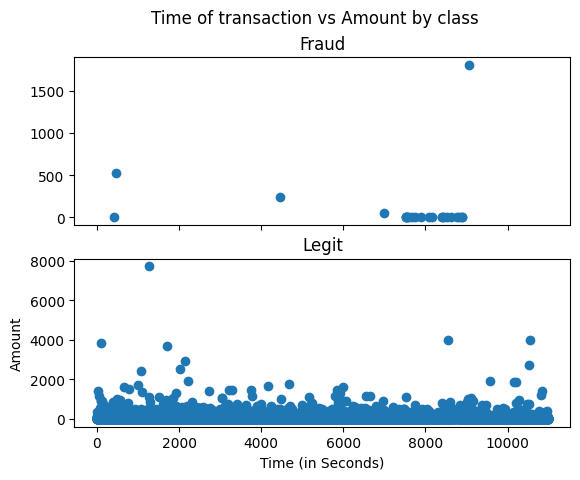

In [30]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(legit.Time, legit.Amount)
ax2.set_title('Legit')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [32]:
X = new_dataset.drop(columns='Class', axis=1)
y = new_dataset['Class']

In [33]:
print(X)

       Time        V1        V2        V3        V4        V5        V6  \
5873   6417  1.282408  0.702030  0.052703  1.297862  0.219690 -1.116206   
2594   2123  1.283067  0.355695  0.073521  0.991784 -0.004908 -0.659602   
6293   7433  0.522485 -1.131764 -1.452175  0.781320  1.881187  3.792453   
2712   2252 -1.583550  0.545735  0.869472  1.305566  1.877753 -0.721648   
7416  10018 -0.308614  0.321557  1.666761  0.516714 -0.332586 -0.351705   
...     ...       ...       ...       ...       ...       ...       ...   
6870   8757 -1.863756  3.442644 -4.468260  2.805336 -2.118412 -2.332285   
6882   8808 -4.617217  1.695694 -3.114372  4.328199 -1.873257 -0.989908   
6899   8878 -2.661802  5.856393 -7.653616  6.379742 -0.060712 -3.131550   
6903   8886 -2.535852  5.793644 -7.618463  6.395830 -0.065210 -3.136372   
6971   9064 -3.499108  0.258555 -4.489558  4.853894 -6.974522  3.628382   

            V7        V8        V9  ...       V20       V21       V22  \
5873  0.539052 -0.503245  

In [34]:
print(y)

5873    0.0
2594    0.0
6293    0.0
2712    0.0
7416    0.0
       ... 
6870    1.0
6882    1.0
6899    1.0
6903    1.0
6971    1.0
Name: Class, Length: 517, dtype: float64


SPLITTING THE DATA INTO TRAINING AND TESTING

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(517, 30) (413, 30) (104, 30)


LOGISTIC REGRESSION MODEL

In [37]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [38]:
from sklearn.metrics import accuracy_score
X_train_prediction = model_lr.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [39]:
print('Accuracy on training data :', training_data_accuracy)

Accuracy on training data : 1.0


In [40]:
X_test_prediction = model_lr.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [41]:
print('Accuracy Score of test data :', test_data_accuracy)

Accuracy Score of test data : 0.9807692307692307
